In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.utils import class_weight # try dealing with inbalanced data

import numpy as np
import pandas as pd
import joblib

features = pd.read_csv("/slipskip/model/features.csv", index_col="date")#.drop(columns=['date'])
labels = pd.read_csv("/slipskip/data/warning_data/slip_warnings_preprocessed.csv", index_col="date")#.drop(columns=['date'])
df = labels.join(features).ffill()
df.index = pd.to_datetime(df.index)
df2 = df[~df.index.month.isin([5, 6, 7, 8, 9])]

In [43]:
y = df["value"].to_numpy()
X = df.drop(columns=["value"]).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
score = clf.score(X_test, y_test).round(3)
print("Logistic regression with all data.")
print("Score is:", score)

print("With", y_test.shape[0], "test samples, this means", ((1-score)*y_test.shape[0]).round(0), "false predictions.")

Logistic regression with all data.
Score is: 0.96
With 1068 test samples, this means 43.0 false predictions.


Logistic regression with May-September removed from data.
Score is: 0.94
With 616 test samples, this means 37.0 false predictions.


c:\Users\ay52498\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


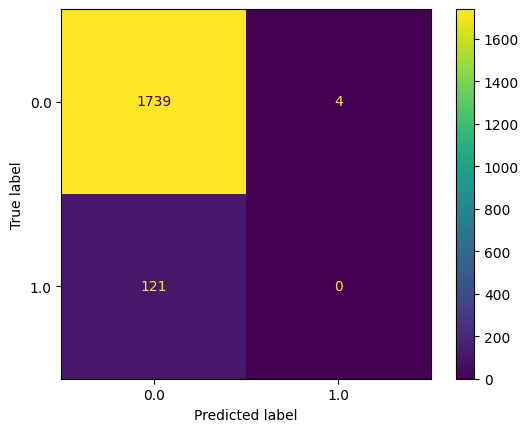

In [112]:
y = df2["value"].to_numpy()
X = df2.drop(columns=["value"]).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
score = clf.score(X_test, y_test).round(3)
print("Logistic regression with May-September removed from data.")
print("Score is:", score)

print("With", y_test.shape[0], "test samples, this means", ((1-score)*y_test.shape[0]).round(0), "false predictions.")
plot_confusion_matrix(clf,X,y)

Score is: 0.951
Cross validation score: 0.915


c:\Users\ay52498\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


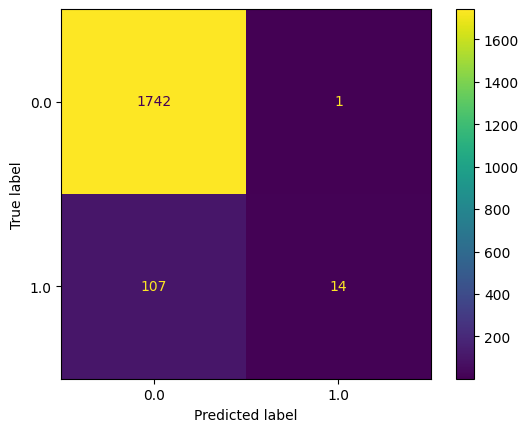

In [111]:
y = df2["value"].to_numpy()
X = df2.drop(columns=["value"]).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=5)
clf2 = clf2.fit(X, y)

score = clf2.score(X_test, y_test).round(3)
score2 = clf2.score(X_train, y_train).round(3)
print("Score is:", score)
print("Cross validation score:", cross_val_score(clf2, X, y, cv=4).mean().round(3))
plot_confusion_matrix(clf2,X,y)


c:\Users\ay52498\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test score is: 1.0
Cross validation score: 0.93


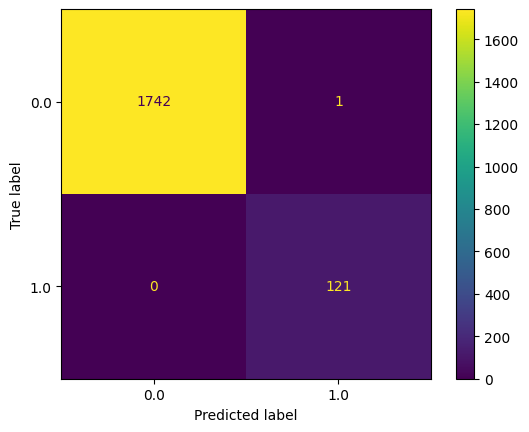

In [132]:
y = df2["value"].to_numpy()
X = df2.drop(columns=["value"]).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
clf3 = RandomForestClassifier(n_estimators=100, max_depth=14, class_weight="balanced")
clf3 = clf3.fit(X, y)

score = clf3.score(X_test, y_test).round(3)
y_pred_test = clf3.predict(X_test)
#score = classification_report(y_test, y_pred_test)
n = confusion_matrix(y_test, y_pred_test)
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
plot_confusion_matrix(clf3,X,y)

print("Test score is:", score)
print("Cross validation score:", cross_val_score(clf3, X, y, cv=3).mean().round(3))


In [135]:
# save model/Python object into file
joblib.dump(clf3, 'random_forest_model')

['random_forest_model']